In [1]:
#CSV Bibliothek importieren 
import csv
#Pandas importieren und als pd bezeichnen
import pandas as pd
#Numpy importieren und als np bezeichnen 
import numpy as np
#Json Biliothek importieren
import json
#Obere Schranke für die Größe der Daten auf 100,000,000 setzen  
csv.field_size_limit(100000000)
#Maximale Anzahl von Zeilen und Spalten Zeigen 
pd.options.display.max_columns = None
pd.options.display.max_rows = None
#Um die Zeiträume bearbeiten zu können
from datetime import datetime
#Seaborn für die Plot importieren
import seaborn as sns
#matplotlib Importieren und als plt bezeichnen
import matplotlib
import matplotlib.pyplot as plt
#Macht die Plots inline
%matplotlib inline 
#dates importieren, um Zeitstempel bearbeiten zu können
import matplotlib.dates as mdates
#tick importieren
import matplotlib.ticker as tick
#Die Nachkommastellen auf 4 Zashlen einschränken
pd.options.display.float_format = '{:.4f}'.format

from matplotlib.ticker import ScalarFormatter
from matplotlib import ticker

import warnings
warnings.filterwarnings("ignore")

***

# TweetsCov19
## KDE-Plot

***

In [2]:
path = '../data/tweetscov19_science_polarized_users_with_atleast_one_polarized_domain.tsv'

df_tweetscov19_science_polarized_and_neutralized = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_antiscience_domains', 'Number_of_proscience_domains', 'Sum_polarised_domains', 'science'])

print('Shape :', df_tweetscov19_science_polarized_and_neutralized.shape)
df_tweetscov19_science_polarized_and_neutralized.head()

Shape : (25491, 5)


,Username,Number_of_antiscience_domains,Number_of_proscience_domains,Sum_polarised_domains,science
0,0002eb2aff20e181397afe8cdebdd395,0,1,1,1.0000
1,0006a238065c3acb128041e666b58f07,0,2,2,1.0000
2,0008667130fe3776676804ff59e8ce3b,0,3,3,1.0000
3,000bcb01b05c0f275601b470ab115a06,-1,0,1,-1.0000
4,000d4b29789dbf222f58a0b29a63b0e1,0,1,1,1.0000


In [3]:
pfad_tsv = '../data/TweetsCov19_alltweets_reputation_deletionratio.tsv'

df_tweetscov19_alltweets_reputation_deletionratio = pd.read_csv(pfad_tsv, sep='\t', error_bad_lines=False, names=['Tweet_Id', 'Username', 'Followers', 'Friends', 'is_deleted', 'Reputation', 'num_posted', 'num_deleted', 'Deletionratio'])

print('Form :', df_tweetscov19_alltweets_reputation_deletionratio.shape)
df_tweetscov19_alltweets_reputation_deletionratio.head()

Form : (9409841, 9)


,Tweet_Id,Username,Followers,Friends,is_deleted,Reputation,num_posted,num_deleted,Deletionratio
0,1178791637348212736,c57d4fb895c5f4a33d2a2b24709f93b5,764191,132,True,0.9998,21,21,1.0000
1,1181705842275573766,c57d4fb895c5f4a33d2a2b24709f93b5,765034,132,True,0.9998,21,21,1.0000
2,1187828746503540738,c57d4fb895c5f4a33d2a2b24709f93b5,766578,132,True,0.9998,21,21,1.0000
3,1192622772658290688,c57d4fb895c5f4a33d2a2b24709f93b5,767939,133,True,0.9998,21,21,1.0000
4,1193272068621717504,c57d4fb895c5f4a33d2a2b24709f93b5,768180,133,True,0.9998,21,21,1.0000


In [4]:
df_tweetscov19_alltweets_reputation_deletionratio = df_tweetscov19_alltweets_reputation_deletionratio[['Username', 'is_deleted', 'Reputation']]

df_tweetscov19_science_polarized_and_neutralized = df_tweetscov19_science_polarized_and_neutralized[['Username', 'science']]

df_tweetscov19 = pd.merge(df_tweetscov19_alltweets_reputation_deletionratio, df_tweetscov19_science_polarized_and_neutralized, on='Username', how='inner')
print('Form :', df_tweetscov19.shape)
df_tweetscov19.head()

Form : (553632, 4)


,Username,is_deleted,Reputation,science
0,1db39d8464b9e42f3e6825cf77fa27f9,False,0.9421,1.0000
1,1db39d8464b9e42f3e6825cf77fa27f9,False,0.9421,1.0000
2,1db39d8464b9e42f3e6825cf77fa27f9,False,0.9421,1.0000
3,1db39d8464b9e42f3e6825cf77fa27f9,False,0.9421,1.0000
4,1db39d8464b9e42f3e6825cf77fa27f9,False,0.9421,1.0000


****

In [7]:
path_tweetscov19 = '../data/tweetscov19_domainsLR_science_polarized_tweets.tsv'

df_tweetscov19 = pd.read_csv(path_tweetscov19, sep='\t', error_bad_lines=False, names=['Tweet_Id', 'Username', 'is_deleted', 'Domains', 'Antisciens_domains', 'number_of_antisciens_domains', 'Prosciens_domains', 'number_of_prosciens_domains', 'tweet_science_polarisation'])

print('Shape :', df_tweetscov19.shape)
df_tweetscov19.head()

Shape : (148308, 9)


,Tweet_Id,Username,is_deleted,Domains,Antisciens_domains,number_of_antisciens_domains,Prosciens_domains,number_of_prosciens_domains,tweet_science_polarisation
0,1178791818135314432,bd25d10d4aa6320e8a48701a9c7f4cbf,False,additudemag.com,['additudemag.com'],-1,[],0,-1.0000
1,1178791899769049091,9d9bb22c54cb933330f754d686d2fb2f,False,pnas.org,[],0,['pnas.org'],1,1.0000
2,1178792638838956032,817ac7fd92c81d3e7aac98defd83de8b,True,thegatewaypundit.com,['thegatewaypundit.com'],-1,[],0,-1.0000
3,1178793544804454402,5c6e2e5a53207f4d92d25a413214a568,True,thegatewaypundit.com,['thegatewaypundit.com'],-1,[],0,-1.0000
4,1178794161350139904,5e368eb454ed3c725e724eeb1a71be48,False,sciencedirect.com,[],0,['sciencedirect.com'],1,1.0000


----

In [4]:
path = '../data/df_tweetscov19_october2019_science_polarized_users.tsv'
October = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'politic'])
print('October: ', '{0:.3g}'.format(October.politic.mean()))

path = '../data/df_tweetscov19_november2019_science_polarized_users.tsv'
November = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'politic'])
print('November: ', '{0:.3g}'.format(November.politic.mean()))

path = '../data/df_tweetscov19_december2019_science_polarized_users.tsv'
December = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'politic'])
print('December: ', '{0:.3g}'.format(December.politic.mean()))

path = '../data/df_tweetscov19_januar2020_science_polarized_users.tsv'
Januar = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'politic'])
print('Januar: ', '{0:.3g}'.format(Januar.politic.mean()))

path = '../data/df_tweetscov19_februar2020_science_polarized_users.tsv'
Februar = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'politic'])
print('February: ', '{0:.3g}'.format(Februar.politic.mean()))

path = '../data/df_tweetscov19_maerz2020_science_polarized_users.tsv'
March = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'politic'])
print('March: ', '{0:.3g}'.format(March.politic.mean()))

path = '../data/df_tweetscov19_April2020_science_polarized_users.tsv'
April = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'politic'])
print('April: ', '{0:.3g}'.format(April.politic.mean()))

path = '../data/df_tweetscov19_mai2020_science_polarized_users.tsv'
Mai = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'politic'])
print('Mai: ', '{0:.3g}'.format(Mai.politic.mean()))


October:  -0.459
November:  -0.381
December:  -0.394
Januar:  -0.328
February:  -0.316
March:  -0.167
April:  -0.278
Mai:  -0.275


***

In [5]:
print('Alle Users:', df_tweetscov19.Username.unique().size)


Alle Users: 22912


In [6]:
# df_tweetscov19 = df_tweetscov19[df_tweetscov19['science'] != 0]

# print('Shape: ', df_tweetscov19.shape)
# df_tweetscov19.head()

In [7]:
df_tweetscov19_del = df_tweetscov19[df_tweetscov19['is_deleted']==True]
df_tweetscov19_undel = df_tweetscov19[df_tweetscov19['is_deleted']==False]

In [8]:
print('Deleted Tweets:', df_tweetscov19_del.shape)
print('Non-deleted Tweets:', df_tweetscov19_undel.shape)

Deleted Tweets: (132911, 4)
Non-deleted Tweets: (382685, 4)


In [9]:
print('Alle Users:', df_tweetscov19.Username.unique().size)

df = df_tweetscov19[df_tweetscov19['science']>0]
print('Alle pro. Users in gesammten Tweets:', df.Username.unique().size)
print('Tweets of pro. Users in gesammten Tweets:', df.shape[0])

df = df_tweetscov19[df_tweetscov19['science']<0]
print('Alle anti. Users in gesammten Tweets:', df.Username.unique().size)
print('Tweets of anti. Users in gesammten Tweets:', df.shape[0])


Alle Users: 22912
Alle pro. Users in gesammten Tweets: 19415
Tweets of pro. Users in gesammten Tweets: 408427
Alle anti. Users in gesammten Tweets: 3332
Tweets of anti. Users in gesammten Tweets: 94720


In [10]:
print('Alle Users:', df_tweetscov19_del.Username.unique().size)

df = df_tweetscov19_del[df_tweetscov19_del['science']>0]
print('Alle pro. Users in gelöschten Tweets:', df.Username.unique().size)
print('Tweets of pro. Users in gelöschten Tweets:', df.shape[0])

df = df_tweetscov19_del[df_tweetscov19_del['science']<0]
print('Alle anti. Users in gelöschten Tweets:', df.Username.unique().size)
print('Tweets of anti. Users in gelöschten Tweets:', df.shape[0])


Alle Users: 6412
Alle pro. Users in gelöschten Tweets: 4699
Tweets of pro. Users in gelöschten Tweets: 74548
Alle anti. Users in gelöschten Tweets: 1613
Tweets of anti. Users in gelöschten Tweets: 52698


In [11]:
print('Alle Users:', df_tweetscov19_undel.Username.unique().size)

df = df_tweetscov19_undel[df_tweetscov19_undel['science']>0]
print('Alle pro. Users in nicht gelöschten Tweets:', df.Username.unique().size)
print('Tweets of pro. Users in nicht gelöschten Tweets:', df.shape[0])

df = df_tweetscov19_undel[df_tweetscov19_undel['science']<0]
print('Alle anti. Users in nicht gelöschten Tweets:', df.Username.unique().size)
print('Tweets of anti. Users in nicht gelöschten Tweets:', df.shape[0])


Alle Users: 19295
Alle pro. Users in nicht gelöschten Tweets: 17037
Tweets of pro. Users in nicht gelöschten Tweets: 333879
Alle anti. Users in nicht gelöschten Tweets: 2141
Tweets of anti. Users in nicht gelöschten Tweets: 42022


In [12]:
df_tweetscov19_neutral = df_tweetscov19[df_tweetscov19['science']==0]
print('Alle Users:', df_tweetscov19_neutral.Username.unique().size)

df = df_tweetscov19_del[df_tweetscov19_del['science']==0]
print('Alle neutral Users in gelöschten Tweets:', df.Username.unique().size)
print('Tweets of neutral Users in gelöschten Tweets:', df.shape[0])

df = df_tweetscov19_undel[df_tweetscov19_undel['science']==0]
print('Alle neutral Users in nicht gelöschten Tweets:', df.Username.unique().size)
print('Tweets of neutral Users in nicht gelöschten Tweets:', df.shape[0])

Alle Users: 165
Alle neutral Users in gelöschten Tweets: 100
Tweets of neutral Users in gelöschten Tweets: 5665
Alle neutral Users in nicht gelöschten Tweets: 117
Tweets of neutral Users in nicht gelöschten Tweets: 6784


In [5]:
def plot_kdeplot_v1(df, hue, x, x_label, titel, name): 
    #fig = plt.figure()
    #ax = fig.add_subplot()
    ax = sns.kdeplot(data=df, x=x, hue=hue, fill=True, legend= False)
    #plt.rcParams["figure.figsize"] = [7,5]

    ax.set_ylabel(ylabel='Density', fontsize=15)
    ax.set_xlabel(xlabel=x_label, fontsize=17)

    ax.tick_params(axis='x', which='major', labelsize=16)
    ax.tick_params(axis='y', which='major', labelsize=15)

    #plt.margins(0.02)
    #fig.tight_layout()
    #plt.show()
    plt.legend(labels = ['Deleted','Non-deleted'], bbox_to_anchor=(0.2, 1.13), ncol=2, loc=2, borderaxespad=0, fontsize=12)
    #g.set_title(titel, fontweight="bold")
    #plt.legend(labels = ['Deleted','Non-deleted'], bbox_to_anchor=(1.02, 1.), loc=2, borderaxespad=0)
    plt.tight_layout()
#     plt.savefig('../plots/'+name+'.pdf')


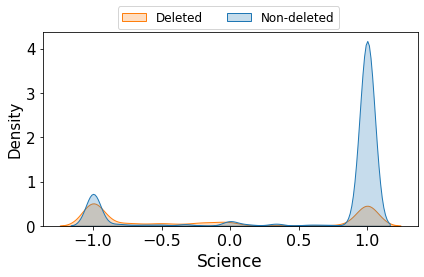

In [6]:
df = df_tweetscov19[['is_deleted', 'science']]
plot_kdeplot_v1(df, 'is_deleted','science' ,'Science' ,'TweetsCov19', 'kdeplot_tweetscov19_science_all_tweets_conditionaldistribution')

In [7]:
def plot_kdeplot_v2(df, hue, x, x_label, titel, name): 
    
    #fig = plt.figure()
    #ax = fig.add_subplot()
    #ax = sns.kdeplot(data=df, x=x, hue=hue, fill=True, legend= False)
    ax = sns.kdeplot(data=df, x=x, hue=hue, multiple="fill", legend= False)

    #plt.rcParams["figure.figsize"] = [7,5]

    ax.set_title('Science', fontsize=22)
    ax.set_ylabel(ylabel='Density', fontsize=22)
    ax.set_xlabel(xlabel=x_label, fontsize=22)

    ax.tick_params(axis='x', which='major', labelsize=18)
    ax.tick_params(axis='y', which='major', labelsize=18)

    #plt.margins(0.02)
    #fig.tight_layout()
    #plt.show()
    #plt.legend(labels = ['Deleted','Non-deleted'], bbox_to_anchor=(0.2, 1.13), ncol=2, loc=2, borderaxespad=0, fontsize=12)
    #g.set_title(titel, fontweight="bold")
    #plt.legend(labels = ['Deleted','Non-deleted'], bbox_to_anchor=(1.02, 1.), loc=2, borderaxespad=0)
    plt.legend([],[], frameon=False)
    plt.tight_layout()
#     plt.savefig('../plots/'+name+'.pdf')


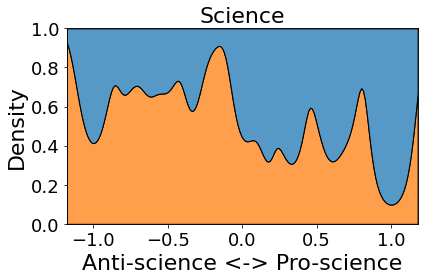

In [8]:
df = df_tweetscov19[['is_deleted', 'science']]
plot_kdeplot_v2(df, 'is_deleted','science' ,'Anti-science <-> Pro-science' ,'TweetsCov19', 'kdeplot_tweetscov19_science_all_tweets_Normalizethestackeddistribution')

In [51]:
def plot_kdeplot_v3(df, hue, x, x_label, titel, name): 
    #ax = sns.kdeplot(data=df, x=x, hue=hue, multiple="fill")
    ax = sns.kdeplot(
    data=df, x=x, hue=hue,
    cumulative=True, common_norm=False, common_grid=True,
    )
    
    ax.set_ylabel(ylabel='Density', fontsize=15)
    ax.set_xlabel(xlabel=x_label, fontsize=17)

    ax.tick_params(axis='x', which='major', labelsize=16)
    ax.tick_params(axis='y', which='major', labelsize=15)

    plt.legend(labels = ['Deleted','Non-deleted'], bbox_to_anchor=(0.2, 1.13), ncol=2, loc=2, borderaxespad=0, fontsize=12)
    #g.set_title(titel, fontweight="bold")
    #plt.legend(labels = ['Deleted','Non-deleted'], bbox_to_anchor=(1.02, 1.), loc=2, borderaxespad=0)
    plt.tight_layout()
#     plt.savefig('../plots/'+name+'.pdf')


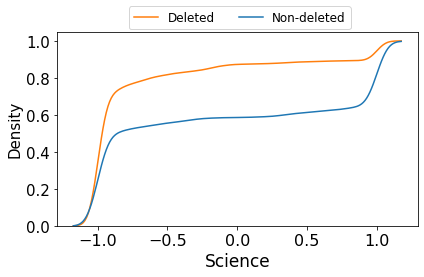

In [52]:
df = df_tweetscov19[['is_deleted', 'science']]
plot_kdeplot_v3(df, 'is_deleted','science' ,'Science' ,'TweetsCov19', 'kdeplot_tweetscov19_science_all_tweets_cumulativedistributionfunction')

***

# Histogram

***

***

In [29]:
def thousands(x, pos):
    if x <1000 :
        return '{:1.0f}'.format(x*1e-3)
    """The two args are the value and tick position."""
    return '{:1.0f}k'.format(x*1e-3)

def plot_histogram(df, titel):
    
    fig, ax = plt.subplots()
    
    
    N, bins, patches = ax.hist(df, bins=11, color = 'gray')
    patches[5].set_label('Neutral')
    patches[5].set_facecolor('gray')
    for i in range(0,5):
        patches[i].set_facecolor('forestgreen')
    patches[1].set_label('Anti-Science')
    for i in range(6,len(patches)):
        patches[i].set_facecolor('gold')
    patches[9].set_label('Pro-Science')
    ax.tick_params(axis='x', which='major', labelsize=18)
    ax.tick_params(axis='y', which='major', labelsize=18)

    figsize=(8, 6)
    ax.set_title('Science', fontsize=22)
    ax.set_ylabel('Number of Tweets', fontsize=22)
    ax.set_xlabel(xlabel='Anti-science <-> Pro-science', fontsize=22)
    ax.yaxis.set_major_formatter(thousands)

    #f = ticker.ScalarFormatter(useOffset=False, useMathText=True)
    #g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
    #ax.yaxis.set_major_formatter(ticker.FuncFormatter(g))
    
    #plt.title('Political polarization', fontsize=18)
    plt.legend(loc='upper center', fontsize=14)
    #plt.legend( fontsize=12)

    plt.tight_layout()
    plt.savefig('../plots/'+titel+'.pdf')

In [30]:
df_tweetscov19_del = df_tweetscov19[df_tweetscov19['is_deleted']==True]
df_tweetscov19_undel = df_tweetscov19[df_tweetscov19['is_deleted']==False]

In [31]:
#matplotlib.rcParams['font.family'] = ['sans-serif']

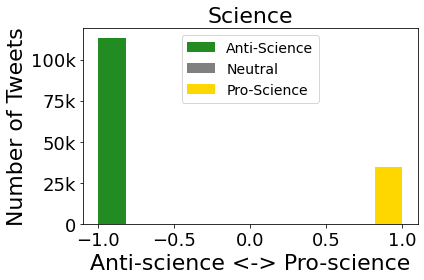

In [32]:
#df = df_tweetscov19.drop_duplicates(subset=['Username'])
df = df_tweetscov19
plot_histogram(df['tweet_science_polarisation'],'hist_tweetsCov19_science_polarized_tweets(alltweets)')

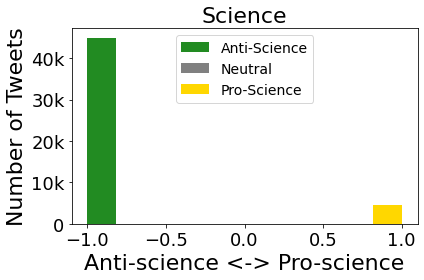

In [33]:
#df = df_tweetscov19_del.drop_duplicates(subset=['Username'])
df = df_tweetscov19_del
plot_histogram(df['tweet_science_polarisation'],'hist_tweetsCov19_science_polarized_tweets(deletedtweets)')

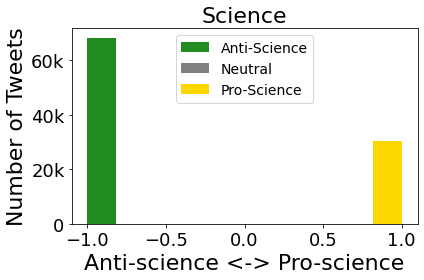

In [34]:
#df = df_tweetscov19_undel.drop_duplicates(subset=['Username'])
df = df_tweetscov19_undel
plot_histogram(df['tweet_science_polarisation'],'hist_tweetsCov19_science_polarized_tweets(nondeletedtweets)')

***

# Heatmap
### Reputation-Polarisierung

***

***

In [5]:
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo

def density_hp(df, title, x, y, color):
    fig = px.density_heatmap(df, x=x, y=y, nbinsx=20, nbinsy=20, color_continuous_scale=color)
    fig.layout.height = 500
    fig.layout.width = 600
    fig.update_layout(
        title= dict(
            text= "Science",
            y=0.95,
            x=0.45,
            xanchor= 'center',
            yanchor= 'top'),
        titlefont = dict(
             family = 'Arial, sans-serif',
             size = 32,
             color = 'Black'
              ),
        xaxis = dict(
            title='Anti-science  <->  Pro-science',
            
            tickmode = 'linear',
            tickformat=".1f",
            dtick = 0.5,
            tickfont = dict(
            family = 'Arial, sans-serif',
            size = 28,
            color = 'black'
              ),
            titlefont = dict(
             family = 'Arial, sans-serif',
             size = 32,
             color = 'Black'
              ),
            ),
        yaxis = dict(
            tickmode = 'linear',
            tickformat=".1f",
            dtick = 0.5,
            tickfont = dict(
            family = 'Arial, sans-serif',
            size = 28,
            color = 'black'
              ),
        titlefont = dict(
             family = 'Arial, sans-serif',
             size = 32,
             color = 'Black'
              ),
            ),
        coloraxis_colorbar=dict(
            title="Tweets",
            thicknessmode="pixels",
            titlefont = dict(
             family = 'Arial, sans-serif',
             size = 32,
             color = 'Black'
              ),
            tickfont = dict(
            family = 'Arial, sans-serif',
            size = 25,
            color = 'black'
              ),
            ),


        )

    #fig.show()
    pyo.plot(fig, filename=title+".html")
#     fig.write_image('../plots/heatmaps/'+title+'.pdf')

In [6]:
#All Tweets
df = df_tweetscov19[['is_deleted', 'science', 'Reputation']]

df_del =  df[df['is_deleted']==True]
df_undel = df[df['is_deleted']==False]

In [7]:
density_hp(df,'density_hp_science_polarisation_tweetscov19_alltweets' ,'science', 'Reputation', 'Greens')

In [8]:
density_hp(df_del,'density_hp_science_polarisation_tweetscov19_deleted' ,'science', 'Reputation', 'Greens')

In [9]:
density_hp(df_undel,'density_hp_science_polarisation_tweetscov19_nondeleted' ,'science', 'Reputation', 'Greens')

****

***

# TweetKB
## KDE-Plot

***

In [15]:
path = '../data/tweetskb_science_polarized_users_with_atleast_one_polarized_domain_v3.tsv'

df_tweetskb_science_polarized_and_neutralized = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_antiscience_domains', 'Number_of_proscience_domains', 'Sum_polarised_domains', 'science'])

print('Shape :', df_tweetskb_science_polarized_and_neutralized.shape)
df_tweetskb_science_polarized_and_neutralized.head()

Shape : (7004, 5)


,Username,Number_of_antiscience_domains,Number_of_proscience_domains,Sum_polarised_domains,science
0,01sth02,0,1,1,1.0000
1,0NoMyProfile,0,1,1,1.0000
2,0_TruthHurts_0,0,1,1,1.0000
3,0dayDB,0,1,1,1.0000
4,101stmonk3y,-1,0,1,-1.0000


In [16]:
path = '../data/TweetsKB_alltweets_reputation_deletionratio.tsv'

df_tweetskb_alltweets_reputation_deletionratio = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Tweet_Id', 'Username', 'Followers', 'Friends', 'is_deleted', 'num_posted', 'num_del', 'Deletionratio',  'Reputation'])

print('Form :', df_tweetskb_alltweets_reputation_deletionratio.shape)
df_tweetskb_alltweets_reputation_deletionratio.head()

Form : (9409841, 9)


,Tweet_Id,Username,Followers,Friends,is_deleted,num_posted,num_del,Deletionratio,Reputation
0,1178791636039589889,DCComics,3349606,563,False,42,0,0.0000,0.9998
1,1179833467644850176,DCComics,3351904,563,False,42,0,0.0000,0.9998
2,1180490470125965313,DCComics,3354879,563,False,42,0,0.0000,0.9998
3,1187059882534400000,DCComics,3369484,562,False,42,0,0.0000,0.9998
4,1190311668141580288,DCComics,3376154,564,False,42,0,0.0000,0.9998


In [17]:
df_tweetskb_alltweets_reputation_deletionratio = df_tweetskb_alltweets_reputation_deletionratio[['Username', 'is_deleted', 'Reputation']]

df_tweetskb_science_polarized_and_neutralized = df_tweetskb_science_polarized_and_neutralized[['Username', 'science']]

df_tweetskb = pd.merge(df_tweetskb_alltweets_reputation_deletionratio, df_tweetskb_science_polarized_and_neutralized, on='Username', how='inner')
print('Form :', df_tweetskb.shape)
df_tweetskb.head()

Form : (59478, 4)


,Username,is_deleted,Reputation,science
0,caveofbeauty,False,0.9898,1.0000
1,caveofbeauty,False,0.9898,1.0000
2,caveofbeauty,False,0.9898,1.0000
3,caveofbeauty,False,0.9898,1.0000
4,caveofbeauty,False,0.9898,1.0000


***

In [18]:
path_tweetskb = '../data/tweetskb_domainsLR_science_polarized_tweets.tsv'

df_tweetskb = pd.read_csv(path_tweetskb, sep='\t', error_bad_lines=False, names=['Tweet_Id', 'Username', 'is_deleted', 'Domains', 'Antisciens_domains', 'number_of_antisciens_domains', 'Prosciens_domains', 'number_of_prosciens_domains', 'tweet_science_polarisation'])

print('Shape :', df_tweetskb.shape)
df_tweetskb.head()

Shape : (34081, 9)


,Tweet_Id,Username,is_deleted,Domains,Antisciens_domains,number_of_antisciens_domains,Prosciens_domains,number_of_prosciens_domains,tweet_science_polarisation
0,1178791802725376003,caveofbeauty,False,researchgate.net,[],0,['researchgate.net'],1,1.0000
1,1178793504056713224,rdrhwke,False,townhall.com,['townhall.com'],-1,[],0,-1.0000
2,1178794456075522049,SamWise4Peace,False,news18.com,['news18.com'],-1,[],0,-1.0000
3,1178794475918954496,jeffthehoffman,False,globalresearch.ca,['globalresearch.ca'],-1,[],0,-1.0000
4,1178794990035701761,John_KissMyBot,True,breitbart.com,['breitbart.com'],-1,[],0,-1.0000


----

In [5]:
path = '../data/df_tweetskb_october2019_science_polarized_users.tsv'
October = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'politic'])
print('October: ', '{0:.3g}'.format(October.politic.mean()))

path = '../data/df_tweetskb_november2019_science_polarized_users.tsv'
November = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'politic'])
print('November: ', '{0:.3g}'.format(November.politic.mean()))

path = '../data/df_tweetskb_december2019_science_polarized_users.tsv'
December = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'politic'])
print('December: ', '{0:.3g}'.format(December.politic.mean()))

path = '../data/df_tweetskb_januar2020_science_polarized_users.tsv'
Januar = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'politic'])
print('Januar: ', '{0:.3g}'.format(Januar.politic.mean()))

path = '../data/df_tweetskb_februar2020_science_polarized_users.tsv'
Februar = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'politic'])
print('February: ', '{0:.3g}'.format(Februar.politic.mean()))

path = '../data/df_tweetskb_maerz2020_science_polarized_users.tsv'
March = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'politic'])
print('March: ', '{0:.3g}'.format(March.politic.mean()))

path = '../data/df_tweetskb_April2020_science_polarized_users.tsv'
April = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'politic'])
print('April: ', '{0:.3g}'.format(April.politic.mean()))

path = '../data/df_tweetskb_mai2020_science_polarized_users.tsv'
Mai = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'politic'])
print('Mai: ', '{0:.3g}'.format(Mai.politic.mean()))


October:  -0.537
November:  -0.531
December:  -0.557
Januar:  -0.564
February:  -0.475
March:  -0.366
April:  -0.416
Mai:  -0.48


***

In [26]:
print('Alle Users:', df_tweetskb.Username.unique().size)


Alle Users: 6105


In [27]:
# df_tweetskb = df_tweetskb[df_tweetskb['science'] != 0]

# print('Shape: ', df_tweetskb.shape)
# df_tweetskb.head()

In [19]:
df_tweetskb_del = df_tweetskb[df_tweetskb['is_deleted']==True]
df_tweetskb_undel = df_tweetskb[df_tweetskb['is_deleted']==False]

In [29]:
print('Deleted Tweets:', df_tweetskb_del.shape)
print('Non-deleted Tweets:', df_tweetskb_undel.shape)

Deleted Tweets: (18560, 4)
Non-deleted Tweets: (31513, 4)


In [30]:
df_tweetskb_del.shape

(18560, 4)

In [31]:
print('Alle Users:', df_tweetskb.Username.unique().size)

df = df_tweetskb[df_tweetskb['science']>0]
print('Alle pro. Users in gesammten Tweets:', df.Username.unique().size)
print('Tweets of pro. Users in gesammten Tweets:', df.shape[0])

df = df_tweetskb[df_tweetskb['science']<0]
print('Alle anti. Users in gesammten Tweets:', df.Username.unique().size)
print('Tweets of anti. Users in gesammten Tweets:', df.shape[0])


Alle Users: 6105
Alle pro. Users in gesammten Tweets: 4871
Tweets of pro. Users in gesammten Tweets: 29458
Alle anti. Users in gesammten Tweets: 1211
Tweets of anti. Users in gesammten Tweets: 18916


In [32]:
print('Alle Users:', df_tweetskb_del.Username.unique().size)

df = df_tweetskb_del[df_tweetskb_del['science']>0]
print('Alle pro. Users in gelöschten Tweets:', df.Username.unique().size)
print('Tweets of pro. Users in gelöschten Tweets:', df.shape[0])

df = df_tweetskb_del[df_tweetskb_del['science']<0]
print('Alle anti. Users in gelöschten Tweets:', df.Username.unique().size)
print('Tweets of anti. Users in gelöschten Tweets:', df.shape[0])


Alle Users: 1353
Alle pro. Users in gelöschten Tweets: 792
Tweets of pro. Users in gelöschten Tweets: 5947
Alle anti. Users in gelöschten Tweets: 547
Tweets of anti. Users in gelöschten Tweets: 11374


In [33]:
print('Alle Users:', df_tweetskb_undel.Username.unique().size)

df = df_tweetskb_undel[df_tweetskb_undel['science']>0]
print('Alle pro. Users in nicht gelöschten Tweets:', df.Username.unique().size)
print('Tweets of pro. Users in nicht gelöschten Tweets:', df.shape[0])

df = df_tweetskb_undel[df_tweetskb_undel['science']<0]
print('Alle anti. Users in nicht gelöschten Tweets:', df.Username.unique().size)
print('Tweets of anti. Users in nicht gelöschten Tweets:', df.shape[0])


Alle Users: 5061
Alle pro. Users in nicht gelöschten Tweets: 4315
Tweets of pro. Users in nicht gelöschten Tweets: 23511
Alle anti. Users in nicht gelöschten Tweets: 734
Tweets of anti. Users in nicht gelöschten Tweets: 7542


In [34]:
df_tweetskb_neutral = df_tweetskb[df_tweetskb['science']==0]
print('Alle Users:', df_tweetskb_neutral.Username.unique().size)

df = df_tweetskb_del[df_tweetskb_del['science']==0]
print('Alle neutral Users in gelöschten Tweets:', df.Username.unique().size)
print('Tweets of neutral Users in gelöschten Tweets:', df.shape[0])

df = df_tweetskb_undel[df_tweetskb_undel['science']==0]
print('Alle neutral Users in nicht gelöschten Tweets:', df.Username.unique().size)
print('Tweets of neutral Users in nicht gelöschten Tweets:', df.shape[0])

Alle Users: 23
Alle neutral Users in gelöschten Tweets: 14
Tweets of neutral Users in gelöschten Tweets: 1239
Alle neutral Users in nicht gelöschten Tweets: 12
Tweets of neutral Users in nicht gelöschten Tweets: 460


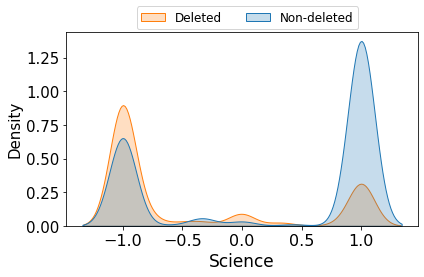

In [18]:
df = df_tweetskb[['is_deleted', 'science']]
plot_kdeplot_v1(df, 'is_deleted','science' ,'Science' ,'TweetsCov19', 'kdeplot_tweetskb_science_all_tweets_conditionaldistribution')

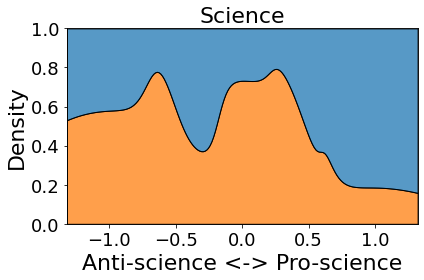

In [19]:
df = df_tweetskb[['is_deleted', 'science']]
plot_kdeplot_v2(df, 'is_deleted','science' ,'Anti-science <-> Pro-science' ,'TweetsCov19', 'kdeplot_tweetskb_science_all_tweets_Normalizethestackeddistribution')

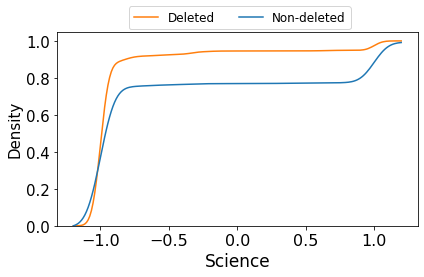

In [54]:
df = df_tweetskb[['is_deleted', 'science']]
plot_kdeplot_v3(df, 'is_deleted','science' ,'Science' ,'TweetsCov19', 'kdeplot_tweetskb_science_all_tweets_cumulativedistributionfunction')

***

# Histogram

***

---

In [21]:
def thousands(x, pos):
    if x <1000 :
        return '{:1.0f}'.format(x*1e-3)
    """The two args are the value and tick position."""
    return '{:1.0f}k'.format(x*1e-3)

def plot_histogram_kb(df, titel):
    
    fig, ax = plt.subplots()
    colors = ['b', 'r']
    labels = ['Liberale', 'konservativ']
    
    N, bins, patches = ax.hist(df, bins=11, color = 'gray')
    patches[5].set_label('Neutral')
    patches[5].set_facecolor('gray')
    for i in range(0,5):
        patches[i].set_facecolor('forestgreen')
    patches[1].set_label('Anti-Science')
    for i in range(6,len(patches)):
        patches[i].set_facecolor('gold')
    patches[9].set_label('Pro-Science')

    ax.tick_params(axis='x', which='major', labelsize=18)
    ax.tick_params(axis='y', which='major', labelsize=18)

    figsize=(8, 6)
    ax.set_title('Science', fontsize=22)
    ax.set_ylabel('Number of Tweets', fontsize=22)
    ax.set_xlabel(xlabel='Anti-science <-> Pro-science', fontsize=22)
    ax.yaxis.set_major_formatter(thousands)

    #plt.title('Political polarization', fontsize=18)
    plt.legend( fontsize=14)
    #plt.legend(loc='upper center', fontsize=14)

    plt.tight_layout()

    plt.savefig('../plots/'+titel+'.pdf')

In [22]:
df_tweetskb_del = df_tweetskb[df_tweetskb['is_deleted']==True]
df_tweetskb_undel = df_tweetskb[df_tweetskb['is_deleted']==False]

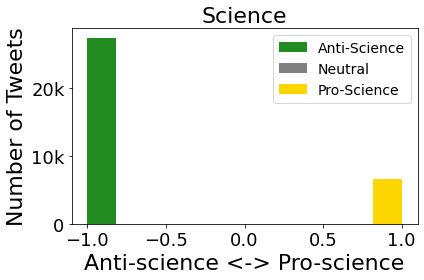

In [35]:
#All Tweets
#df = df_tweetskb.drop_duplicates(subset=['Username'])
df = df_tweetskb
plot_histogram_kb(df['tweet_science_polarisation'],'hist_tweetsKB_science_polarized_tweets(alltweets)')

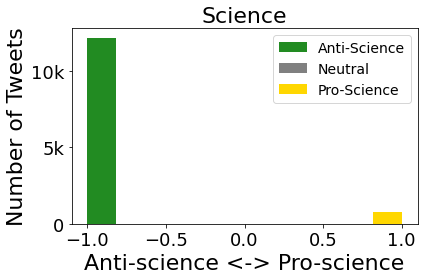

In [36]:
#df = df_tweetskb_del.drop_duplicates(subset=['Username'])
df = df_tweetskb_del
plot_histogram_kb(df['tweet_science_polarisation'],'hist_tweetsKB_science_polarized_tweets(deletedtweets)')

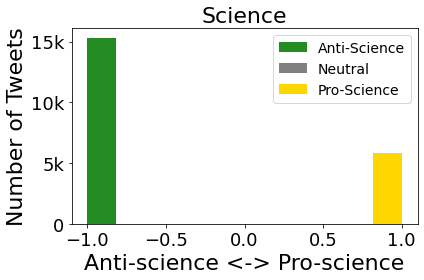

In [37]:
#df = df_tweetskb_undel.drop_duplicates(subset=['Username'])
df = df_tweetskb_undel
plot_histogram_kb(df['tweet_science_polarisation'],'hist_tweetsKB_science_polarized_tweets(nondeletedtweets)')

***

# Heatmap
### Reputation-Polarisierung

***

In [18]:
#All Tweets
df = df_tweetskb[['is_deleted', 'science', 'Reputation']]

df_del =  df[df['is_deleted']==True]
df_undel = df[df['is_deleted']==False]

In [19]:
density_hp(df,'density_hp_science_polarisation_tweetskb_alltweets' ,'science', 'Reputation', 'Greens')

In [20]:
density_hp(df_del,'density_hp_science_polarisation_tweetskb_deleted' ,'science', 'Reputation', 'Greens')

In [21]:
density_hp(df_undel,'density_hp_science_polarisation_tweetskb_nondeleted' ,'science', 'Reputation', 'Greens')